<a href="https://www.kaggle.com/code/franciscangeno/k-means-practice?scriptVersionId=113072962" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# DATASET
The dataset used throught this notebook is from Kaggle and contains information on percentagres and the number of reported crime cases in different states in the US. I am using Kmeans with Python to group the states into how safe the states are(Clusters depending on levels of safety in the state).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import seaborn as sns
import random
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kmeans-practicing/crime_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/kmeans-practicing/crime_data.csv")

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df=df.rename(columns={"Unnamed: 0": "State"})

In [5]:
df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
# check for null values
df.isnull().mean()

State       0.0
Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

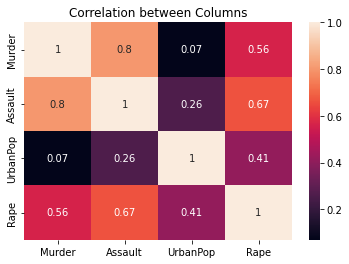

In [7]:
# check for correlation
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between Columns")
plt.show()

<Figure size 1080x432 with 0 Axes>

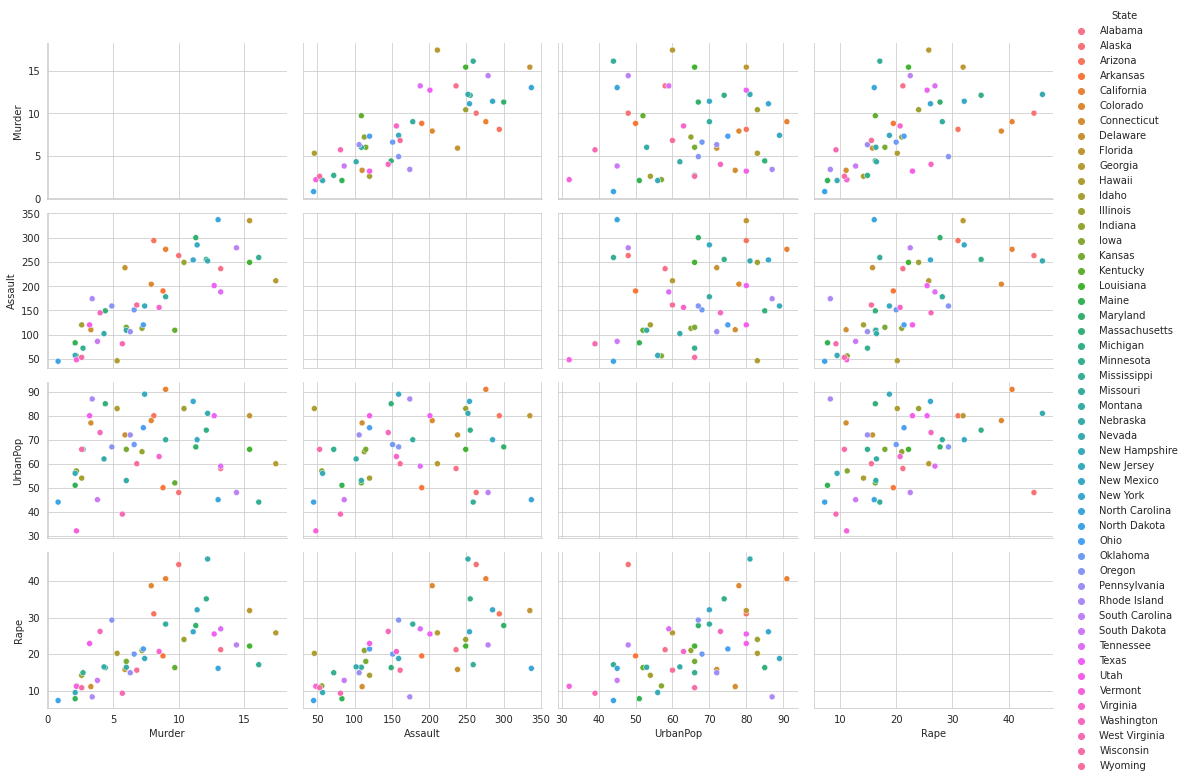

In [8]:
# Let's plot the pairplot for the dataset scattered by Gender
sns.set_style('whitegrid')
plt.figure(1 , figsize = (15 , 6))
sns.pairplot(df, hue='State', aspect=1.5)
plt.show()

We can create six different relationships to cluster the data
* Assault against Murder
* UrbanPop against Murder
* Rape against murder
* Assault against UrbanPop
* Rape against UrbanPop
* Rape against Assault

# **K-Means Clustering**
**Steps To Follow**
 1. Randomly initialise two points , call them centroids.
 2. Go through each of the datapoints in the dataset.
 3. Assign each of the datapoints to a specific centroid depending on whether or not it is close to the centroid.
 4. Take the 2 centroids and move them to the average of the datapoints, coloured the same. 
 5. Repeat till K-Means has converged.



# **1. Clustering Assault With Murder**

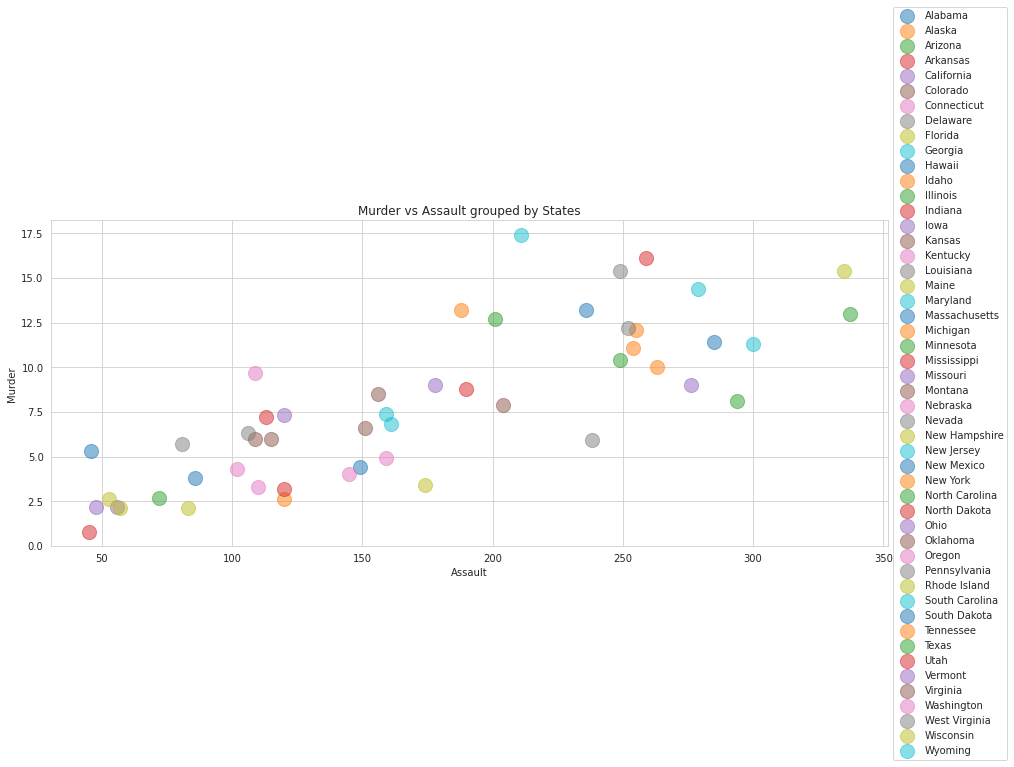

In [9]:
plt.figure(1,figsize=(15,6))
for state in df['State']:
    plt.scatter(x="Assault", y="Murder",data=df[df['State']==state],s=200,alpha=0.5,label=state)
plt.xlabel('Assault'),
plt.ylabel('Murder') 
plt.title('Murder vs Assault grouped by States')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
X=df["Assault"].values
y=df["Murder"].values

In [11]:
X=X.ravel()
X.shape

(50,)

In [12]:
# define the euclidian distance of two vectors x1 and x2
def euclidian_distance(x1,x2):
    #return the  sum of squared distances
    return np.sqrt(np.sum((x1-x2)**2))
# kmeans class

class kmeans:
    
    def __init__(self,k=random.randint(2,10),max_iters=100,plot_steps=False):
        # set them
        self.k = k
        self.max_iters=max_iters
        self.plot_steps = plot_steps
        #  create a list of sample indices for each cluster
        #  empty list for each cluster
        self.clusters = [[]for _ in range(self.k)]
        # create another list for mean feature vectors of each cluster
        self.centroids = []
    
    def predict(self,X):
        self.X = X
        self.n_samples,self.n_features = X.shape
        # initialize the centroids
        random_sample_idxs=np.random.choice(self.n_samples,self.k,replace=True)
        #  assign the according sample that belongs to the index to our centroids
        self.centroids= [self.X[idx] for idx in random_sample_idxs]
        # optimization 
        for _ in range(self.max_iters):
            #  update our clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            #  update the centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()
            #  check for convergence (if so, break)
            if self._is_converged(centroids_old,self.centroids):
                break
            #   return cluster labels(classify samples as the index of their clusters)
        return self._get_cluster_labels(self.clusters)
    
    #     helper functions 
    def _get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        #  for every sample, we want to get which cluster it was assigned to
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    
    def _create_clusters(self, centroids):
        #         assign the samples to the closest centroid to create our clusters
        self.clusters = [[]for _ in range(self.k)]
        #         iterate over the data
        for idx,sample in enumerate(self.X):
            # get the closest centroid and its index
            centroid_idx = self._closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    
    def _closest_centroid(self,sample,centroids):
        # calculate the distance of the closest sample to each centroid
        #  get the index of the centroid which has the  closest distance      
        #   calculate all the distances
        distances = [euclidian_distance(sample,point) for point in centroids]
        # which is the index with the minimum distance?
        closest_idx = np.argmin(distances)
        return closest_idx
    
    
    def _get_centroids(self,clusters):
        # initialize the centroids with zeros first
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            # now that we have the mean, assign it to the current centroid
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidian_distance(centroids_old[i],centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
        
    
    def plot(self):
        fig, ax= plt.subplots(figsize=(12,8))
        # iterate over the clusters
        for i, index in enumerate(self.clusters):
            # get the current point
            point = self.X[index].T
            ax.scatter(*point)
            
        for point in self.centroids:
            ax.scatter(*point, marker="x", color = "black", linewidth=2)
        plt.show()

In [13]:
clusters = len(np.unique(y))
print(y)

[13.2 10.   8.1  8.8  9.   7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2
  2.2  6.   9.7 15.4  2.1 11.3  4.4 12.1  2.7 16.1  9.   6.   4.3 12.2
  2.1  7.4 11.4 11.1 13.   0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 13.2
 12.7  3.2  2.2  8.5  4.   5.7  2.6  6.8]


In [14]:
# k = kmeans(k=clusters, max_iters=150, plot_steps=True)
# ypred = k.predict(X)
# k.plot()

In [15]:
# # initialise k 
# k = random.randint(1,20)
# # 

In [16]:
# from sklearn.datasets import make_blobs

# X, y = make_blobs(
#     centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
# )
# print(X.shape)

# clusters = len(np.unique(y))
# print(clusters)

# **THE ELBOW METHOD**
Run k-means on the dataset or a given range of values

In [17]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# X['State'] = le.fit_transform(X['State'])

# y = le.transform(y)

In [18]:
# there are no null values
# Encode area names 

In [19]:
# encoder=ce.OneHotEncoder(cols=['State'],return_df=True,use_cat_names=True)

# #Original Data
# print(df)

# #Fit and transform Data
# df_encoded = encoder.fit_transform(df)
# df_encoded